# Session 2 : Supervised learning (1/3)

## Preliminaries

Before using the algorithms on real case datasets, we are going to experiment them on artificially generated datasets. We call these types of datasets **toy datasets**. Use the appropriate magic command to load the script `datasets.py` (it contains functions to generate toy datasets).

In [1]:
# we can use %load datasets.py, but this will just import all
# the code of datasets.py into this cell. We can also use
# %run datasets.py. This will run the script so all the functions
# will be loaded and ready for future use
%run datasets.py

## k-Nearest Neighbors : Classification

### Toy dataset

The dataset we are going to use is a set of points which have either the label `0` or `1`. Use the appropriate command to look at the source code of the function `make_forge()` and use it to create a set of points `X` and a set of labels `y`. How many points have been generated ?

In [2]:
# print source code of make_forge()
??make_forge

# by looking at the source code of make_forge(), we can
# see that it returns two elements : X and y. So if we call
# make forge, we need to assign it to two different variables

In [3]:
# create X and y. How many elements in X ?
X, y = make_forge(100)
print("First 5 rows of X")
print(X[:5]) # first 5 elements
print("First 5 rows of y")
print(y[:5]) # first 5 elements
print("There are", len(X), "elements in X.")

First 5 rows of X
[[11.563957    1.3389402 ]
 [10.06721983  4.08616331]
 [ 8.77253877  2.33030515]
 [10.12748869  5.32277484]
 [ 9.06439343  1.74115688]]
First 5 rows of y
[0 1 1 1 0]
There are 100 elements in X.


Now load the `matplotlib` library and use the right method to visualize a set of points on a 2D plan. Look at the documentation and use the approriate argument so that points labeled with `0` have a different color from the points with the label `1`.

In [4]:
# load the library
import matplotlib.pyplot as plt

# print the points X with matplotlib
# to print a set of points, we need to use plt.scatter()
# Let's first look at the documentation
#plt.scatter?

# we can read that scatter() takes 2 arguments: x and y
# be careful, x and y refers to the x-axis and y-axis position
# of our points. In our case, these information are the first and
# second column of X. scatter() can also take another argument c
# that specify the color of each point. We use the y variable
# because it contains either 0 or 1 for each point
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<Figure size 640x480 with 1 Axes>

### Learning a model

As we saw in the course, the first step is to separate our dataset into a training and a test part. Use the function `train_split_test()` library to create four variables :
* points for training
* labels for training
* points for test
* labels for test

Use the parameter `random_state = 0` so the the experiments can be replicated.

In [5]:
from sklearn.model_selection import train_test_split
# by looking at the documentation of train_test_split,
# we can see that it returns 4 variable, in that order :
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
len(X_test)

25

In [7]:
len(X_train)

75

Then, we can create a KNN model and specify the parameter `k`. Create a model with `k = 3`.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# with the documentation, we can see that one argument of
# KNeighborsClassifier is n_neighbors
model = KNeighborsClassifier(n_neighbors=3)

Train the model on your training data (with the `.fit()` method) and evaluate its performance (with the `.score()` method) on the test data. How much accuracy do you get ?

In [9]:
# training
model.fit(X_train, y_train)

# evaluation
accuracy  = model.score(X_test, y_test)
print("Accuracy =", accuracy)
print("# Misclassified points =", (1 - accuracy) * len(X_test))

Accuracy = 0.84
# Misclassified points = 4.000000000000001


We have an accuracy of 85.7%. Since we have 7 points in X_test, this means we have only 1 point that is misclassified (because 6 points correctly classified out of 7 gives 6/7 = 0.857).

It is interesting to see the boundary decision of our model (i.e. the line indicating where the points are labeled 0 or 1). Run the following piece of code to see it.

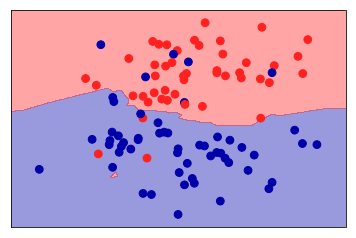

Text(0.5, 1.0, 'Decision boundary when k=3')

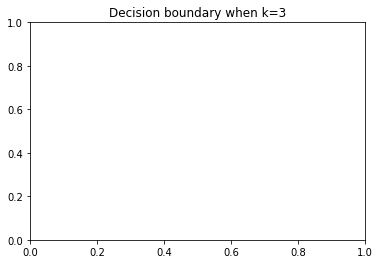

In [10]:
%run plots.py
plot_2d_separator(model, X, y, fill=True, eps=0.5, alpha=0.4)
plt.show()
plt.title("Decision boundary when k=3")

Create other models with a different value for `k` (use 1, 9 and 15). Train and evaluate each model. Which one is the best one ? 

In [11]:
# k = 1
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(X_train, y_train)
accuracy_1 = model_1.score(X_test, y_test)
print("Accuracy (k=1) =", accuracy_1)

# k = 9
model_9 = KNeighborsClassifier(n_neighbors=9)
model_9.fit(X_train, y_train)
accuracy_9 = model_9.score(X_test, y_test)
print("Accuracy (k=9) =", accuracy_9)

# k = 15
model_15 = KNeighborsClassifier(n_neighbors=15)
model_15.fit(X_train, y_train)
accuracy_15 = model_15.score(X_test, y_test)
print("Accuracy (k=15) =", accuracy_15)

Accuracy (k=1) = 0.8
Accuracy (k=9) = 0.84
Accuracy (k=15) = 0.84


We can see that all models have the same accuracy (85.7%). This means that they all have misclassified only one point on test set (1 out of 7). With larger dataset, the difference would be more significative between models.

Look at the the decision boundary for each of these models. What can be said about the decision boundary when `k` is low ? When `k` is large ?

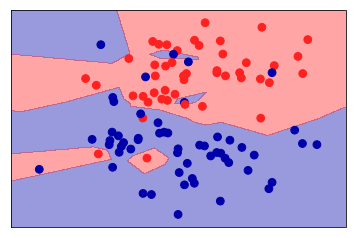

Text(0.5, 1.0, 'Decision boundary when k=1')

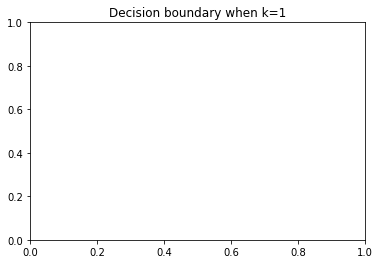

In [12]:
# decision boundary for each models
plot_2d_separator(model_1, X, y, fill=True, eps=0.5, alpha=0.4)
plt.show()
plt.title("Decision boundary when k=1")

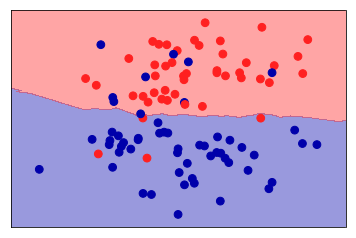

Text(0.5, 1.0, 'Decision boundary when k=9')

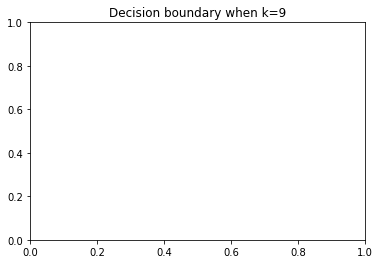

In [13]:
plot_2d_separator(model_9, X, y, fill=True, eps=0.5, alpha=0.4)
plt.show()
plt.title("Decision boundary when k=9")

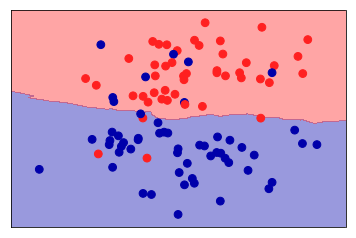

Text(0.5, 1.0, 'Decision boundary when k=15')

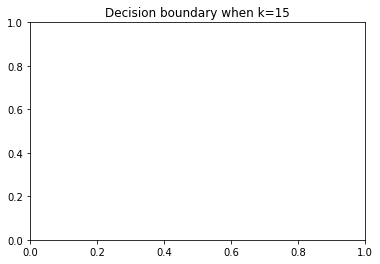

In [14]:
plot_2d_separator(model_15, X, y, fill=True, eps=0.5, alpha=0.4)
plt.show()
plt.title("Decision boundary when k=15")

When K is low , the boundary is very close to some points and sometimes try to englobe as many points as possible, even if that mean to create small circles. When K is higher, the boundary is more smooth and is more like a line.

In general, when K is low the model is complex (every point will be well classified if enough neighbors are around) while when K is large, the model is simple (but some points are misclassified).

### Real dataset

Sklearn comes with some real case datasets. One of them is the Wisconsin breast cancer dataset. It contains information (measurements) of breast cancer tumors. Each tumor is either "benign" or "malignant" (so it is a binary classification problem). We are going to use KNN to predict if a tumor is "benign" or "malignant".

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR) # uncomment for more information
print(cancer.keys())

dict_keys(['target_names', 'feature_names', 'data', 'DESCR', 'filename', 'target'])


This dataset contains 569 data points, each one has 30 attributes (called features). The data can be accessed with `cancer.data` and the labels with `cancer.target`.

In [16]:
print(cancer.data.shape)
print(cancer.data[0])
print(cancer.target[0])

(569, 30)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
0


Separate the points into a training and a test datasets with `random_state = 0`.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

Create a KNN classifier with six neighbors and train it with the appropriate data.

In [18]:
model_breast = KNeighborsClassifier(n_neighbors=6)
model_breast.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

The main objective of a classifier model is to be able to predict the label of points we have never seen yet. You can use the `.predict()` method of your classifier and feed it with one or more data points. The result will be the label(s) predicted by your model.

In [19]:
model_breast.predict([X_test[0]]) # replace model with the name of your model

array([0])

Now compute the accuracy of your model on the entire test dataset.

In [20]:
accuracy_breast = model_breast.score(X_test, y_test)
print("Accuracy on breast cancer =", accuracy_breast)

Accuracy on breast cancer = 0.9230769230769231


## k-Nearest Neighbors : Regression

We can also do regression with the KNN algorithm. Instead of assigning the most frequent label of the k nearest neighbors, we can average the value of the neighbors. Hence we predict a value instead of a class.

Use the `make_wave()` function to create a toy dataset of `40` points for regression.

In [21]:
X, y = make_wave(40)
print("X has", len(X), "points.")

X has 40 points.


In [22]:
print("X:", X[:5])
print("y:", y[:5])

X: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
y: [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632]


We can visualize the points with the following piece of code.

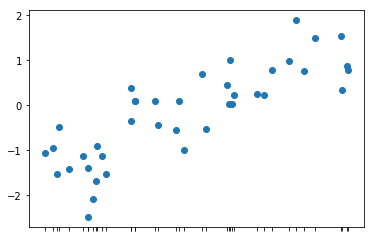

In [23]:
plt.scatter(X, y)
plt.xticks(X, "")
plt.show()

Separate the dataset into a training part and a test part with `random_state = 0`. Then create several models for a KNN regression (at least 3 different models) with different values for the number of neighbors used. Train and evaluate them. What is your best accuracy ?

In [24]:
from sklearn.neighbors import KNeighborsRegressor

# create train + test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# create regression models, train and evaluate
regmodel_2 = KNeighborsRegressor(n_neighbors=2)
regmodel_2.fit(X_train, y_train)
print("Accuracy (k=2)", regmodel_2.score(X_test, y_test))

regmodel_3 = KNeighborsRegressor(n_neighbors=3)
regmodel_3.fit(X_train, y_train)
print("Accuracy (k=3)", regmodel_3.score(X_test, y_test))

regmodel_4 = KNeighborsRegressor(n_neighbors=4)
regmodel_4.fit(X_train, y_train)
print("Accuracy (k=4)", regmodel_4.score(X_test, y_test))

regmodel_5 = KNeighborsRegressor(n_neighbors=5)
regmodel_5.fit(X_train, y_train)
print("Accuracy (k=5)", regmodel_5.score(X_test, y_test))

regmodel_7 = KNeighborsRegressor(n_neighbors=7)
regmodel_7.fit(X_train, y_train)
print("Accuracy (k=7)", regmodel_7.score(X_test, y_test))

print("Best accuracy achieved when k=3")

Accuracy (k=2) 0.6557491875542131
Accuracy (k=3) 0.8344172446249604
Accuracy (k=4) 0.7704189018456431
Accuracy (k=5) 0.7071381144011731
Accuracy (k=7) 0.6752134587675717
Best accuracy achieved when k=3


## Linear models

Linear models are mostly used to do regression (predicting a value given a set of features). You can use a linear model to do classification but we will focus on regression in this course. The predicted value $\hat{y}$ can be written as follows:

\begin{equation*}
\hat{y} = \sum_{k=1}^n w_k \times x_k + b
\end{equation*}

where $x_k$ are the features of the data points, $w_k$ and $b$ are the parameters learned by the linear model.

### Ordinary Least Squares

Ordinary Least Squares is the most classic linear method for regression. This model finds the $w$ and $b$ parameters that minimize the **mean squared error (MSE)** between predictions and the true value for the $m$ points in training dataset.

\begin{equation*}
MSE = {1 \over {m}} \sum_{k=1}^m (\hat{y}-y)^2
\end{equation*}

Generate a toy dataset for regression with the function `make_wave()` composed of `80` data points. Then split this dataset into a training and a test dataset with `random_state = 0`.

In [25]:
X, y = make_wave(n_samples=80)
print("X has", len(X), "points.")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X has 80 points.


Then we can create a linear model and train it on the right dataset.

In [26]:
from sklearn.linear_model import LinearRegression
# create model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The learned $w$ are in the `coef_` attribute while the learned $b$ are in the `intercept_` attribute. Since our data only has one feature, we only have one $w$.

In [27]:
print("Learned w:", model.coef_)
print("Learned b:", model.intercept_)

Learned w: [0.53507564]
Learned b: 0.08379436222175102


In the same way as before, we can compute the estimated output with the `predict()` method.

In [28]:
print("Model prediction =", model.predict([X_test[0]]))
print("Hand computed prediction =", model.coef_[0] * X_test[0] + model.intercept_)
print("Correct output =", y_test[0])

Model prediction = [1.59137414]
Hand computed prediction = [1.59137414]
Correct output = 1.0562427958164118


### Real dataset

We are going to predict the price of houses given some features. The data come from the housing market in Boston. We have 506 data points, and each one has 104 features.

In [29]:
X, y = load_extended_boston()
print(X.shape)
print(y.shape)
print(y[:3]) # some house prices

(506, 104)
(506,)
[24.  21.6 34.7]


In [30]:
# separate the data into a training set and a test set with
# random_state = 0. Then train a linear model and predict the
# price of the first house in the test set. Compare it with the 
# actual price of the house.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
model_house = LinearRegression()
model_house.fit(X_train, y_train)
print("Predicted price =", model_house.predict([X_test[0]]))
print("Real price =", y_test[0])

Predicted price = [23.65294082]
Real price = 22.6


In [31]:
# we can also compute the score of the model. Compare
# the score obtained on the training data and the score
# on the test data. 
# Do you thing we are underfitting or overfitting ? Explain why ?
print(model_house.score(X_train, y_train))
print(model_house.score(X_test, y_test))

0.9520519609032734
0.6074721959666214


We are overfitting because our training accuracy is very good but our test accuracy is bad.

### Regularization

Sometimes, the linear model can overfit. This means that it will be good on the training set, but not on the test set. One way to control overfitting is to add a regularization to our model. We can add a constraint to the objective being minimized by the model.

We will see a L2 normalization that minimizes the norm 2 of the weights $w$ of the model. The name of this new type of model is called **Ridge regression** and it minimizes :

\begin{equation*}
MSE + Regularization = {1 \over {m}} \sum_{k=1}^m (\hat{y}-y)^2 + \lambda \left\lVert w \right\rVert ^2
\end{equation*}

$\lambda$ is a parameter to adjust the effect of regularization.

In [32]:
from sklearn.linear_model import Ridge

# create a model Ridge, train it on the same training
# set made of the Housing market and evaluate its
# training score and test score. Do you have any improvement ?
# Is it better compared to a model with no regularization ?
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
print("Training accuracy =", model_ridge.score(X_train, y_train))
print("Test accuracy =", model_ridge.score(X_test, y_test))

Training accuracy = 0.8857966585170942
Test accuracy = 0.7527683481744755


We have a better test accuracy and less difference between training and test accuracy. This means we have a more accurate model and have reduced the overfitting so this is a good improvement over the model which has no regularization.

In [33]:
# try different Ridge() models with different values for
# the alpha parameter (read the documentation if necessary).
# Then compute the training and test scores for each model.
# Can you tell what is the influence of alpha on the scores ?
model_ridge_01 = Ridge(alpha=0.1)
model_ridge_01.fit(X_train, y_train)
print("Training accuracy (alpha=0.1) =", model_ridge_01.score(X_train, y_train))
print("Test accuracy     (alpha=0.1) =", model_ridge_01.score(X_test, y_test))

model_ridge_02 = Ridge(alpha=0.2)
model_ridge_02.fit(X_train, y_train)
print("Training accuracy (alpha=0.2) =", model_ridge_02.score(X_train, y_train))
print("Test accuracy     (alpha=0.2) =", model_ridge_02.score(X_test, y_test))

model_ridge_05 = Ridge(alpha=0.5)
model_ridge_05.fit(X_train, y_train)
print("Training accuracy (alpha=0.5) =", model_ridge_05.score(X_train, y_train))
print("Test accuracy     (alpha=0.5) =", model_ridge_05.score(X_test, y_test))

model_ridge_2 = Ridge(alpha=2)
model_ridge_2.fit(X_train, y_train)
print("Training accuracy (alpha=2)   =", model_ridge_2.score(X_train, y_train))
print("Test accuracy     (alpha=2)   =", model_ridge_2.score(X_test, y_test))


Training accuracy (alpha=0.1) = 0.9282273685001989
Test accuracy     (alpha=0.1) = 0.7722067936479813
Training accuracy (alpha=0.2) = 0.9199279491313915
Test accuracy     (alpha=0.2) = 0.7749447069768511
Training accuracy (alpha=0.5) = 0.9037403798627098
Test accuracy     (alpha=0.5) = 0.7675638302587819
Training accuracy (alpha=2)   = 0.8619066525203294
Test accuracy     (alpha=2)   = 0.7284531415325122


When alpha (lambda in the formula) is increased, the regularization is more effective hence the gap between training and test accuracy is reduced. We are preventing overfitting as we increase alpha.

But when alpha is too big, the model tries to minimize the norm of W more than the MSE. The performance starts to become bad. The main idea is to find the best alpha that maximizes the performance of our model.